# <span style="color:black"> Numerical Simulation Laboratory (NSL) </span>

## Francesco Gnan - <span style="color:grey">  Numerical Exercises 3</span>
------------------------------------------------------------------------------------------------------------------------------

## <span style="color:red"> Introduction </span>

In this exercise we want to see that the Monte Carlo approach allows us to estimate the **call** and **put** prices of any option.
To do this, we study the specific case of a **European option**, whose analytical solution is known thanks to the **Black-Scholes theory**.
This theory is based on some assumptions:
   - 1. The market is maximally efficient, i.e., it is infinitely liquid and does not exhibit any friction.
   - 2. The time evolution of the asset price $S(t)$ is stochastic and exhibits geometric Brownian motion $\left(GMB(r,\sigma^2)\right)$ with constant risk-free interest rate $r$ and volatility $\sigma$. 
   
In this study we will consider: $S(t=0)=100$, $T=1$, $K=100$, $r=0.1$, $\sigma=0.25$.

------------------------------------------------------------------------------------------------------------------------------

An **option** is a financial contract that is sold by the **writer** and bought by the **holder**. The holder has the right to sale or purchase of a certain asset at a certain time and at a certain price , called the strike price **K**, which is established at the time the agreement between the parties is made.
The writer has to buy or sell that asset at a certain price **T** if the holder requests it.

There are different kind of options. In European options the writer assures the holder of the right to:
   - **call**: buy from the writer an asset at an agreed price K at a certain time T
   - **put**: sell to the writer this same asset at the price K at the time T

Below there is a list of the packages that will be used during this notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:red"> Exercise 03.1 </span>

In this first exercise we sample directly the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$. We estimate how much the holder of the option have to pay at $t=0$ on the basis of the expected profit at time $t=T$.

  - We extract $Z\sim\mathcal{N}(0,1)$ 
  - We compute $S(T) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)T+\sigma Z\right]$
  - We evaluate the call price: $C = \exp\left(-r T\right)\max\left(0\,,S(T) - K\right)$
  - We evaluate the put price: $P = \exp\left(-r T\right)\max\left(0\,,K -S(T)\right)$
  
these operations are performed in the <font face = "Courier"> `es03.1.cpp` </font> file. Simulating the price of a certain asset $S(t)$ as a $GBM(r,\sigma^2)$, we obtain $S(T)$. Therefore, to derive the accumulated profit in a time T, we need to multiply $S(T)$ by a factor $\exp\left(-r T\right)$. r corresponds to the interest rate that a bank would guarantee us in the continuum if we deposited a certain amount of money at time $t=0$.
 
we report results by applying data blocking.

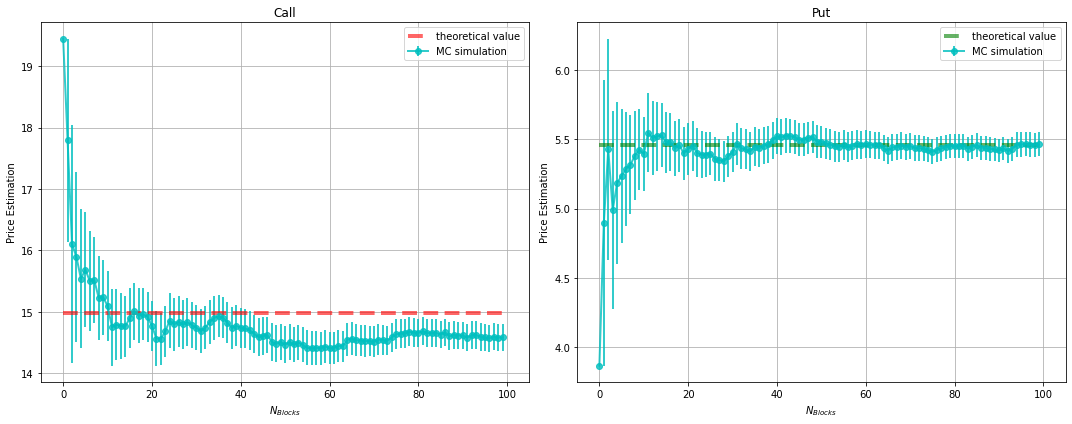

Stima finale:  call = 15.0817 +- 0.213464
Stima finale:  put = 5.54663 +- 0.0861599


In [7]:
x1, sum_prog1, err_prog1 = np.loadtxt("./Risultati/es03.1a.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x2, sum_prog2, err_prog2 = np.loadtxt("./Risultati/es03.1b.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title(r"Call")
plt.errorbar(x1,sum_prog1-0.5,yerr=err_prog1,marker='o',color='c', alpha=0.8,linewidth=2, label='MC simulation')
plt.xlabel('$N_{Blocks}$')
plt.ylabel('Price Estimation')
plt.hlines(14.975790778311286,0,100, color='red', linestyle='--', label="theoretical value", linewidth=4, alpha=0.6)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title(r"Put")
plt.errorbar(x2,sum_prog2-1/12,yerr=err_prog2,marker='o',color='c', alpha=0.8, linewidth=2, label='MC simulation')
plt.xlabel('$N_{Blocks}$')
plt.ylabel('Price Estimation')
plt.hlines(5.4595325819072364,0,100, color='green', linestyle='--', label="theoretical value", linewidth=4, alpha=0.6)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print('Stima finale:  call = ' + str(sum_prog1[-1]) + ' +- ' + str(err_prog1[-1]))
print('Stima finale:  put = ' + str(sum_prog2[-1]) + ' +- ' + str(err_prog2[-1]))


## <span style="color:red"> Exercise 03.2 </span>

In this second exercise we sample the discretized $GBM(r,\sigma^2)$ path of the asset price
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$.
In the <font face = "Courier"> `es03.2.cpp` </font> file we proceed as in the previous exercise by introducing a <font face = "Courier"> `for` </font> loop and calculating C and P step by step. Each step is characterized by an increment $h = t_{i+1}-t_i = 0.01$.

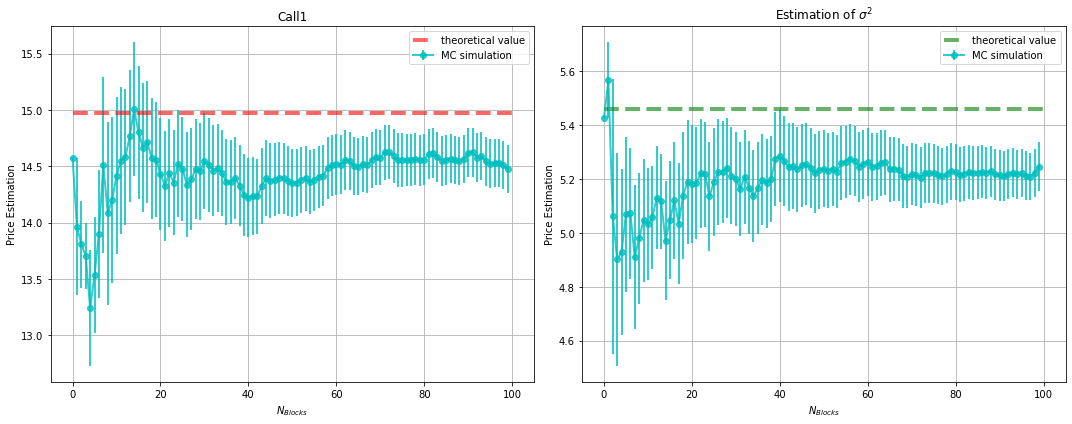

Stima finale:  call = 14.9777 +- 0.212725
Stima finale:  put = 5.32956 +- 0.0909738


In [8]:
x1, sum_prog1, err_prog1 = np.loadtxt("./Risultati/es03.2a.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
x2, sum_prog2, err_prog2 = np.loadtxt("./Risultati/es03.2b.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title(r"Call1")
plt.errorbar(x1,sum_prog1-0.5,yerr=err_prog1,marker='o',color='c', alpha=0.8,linewidth=2, label='MC simulation')
plt.xlabel('$N_{Blocks}$')
plt.ylabel('Price Estimation')
plt.hlines(14.975790778311286,0,100, color='red', linestyle='--', label="theoretical value", linewidth=4, alpha=0.6)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title(r"Estimation of $\sigma^2$")
plt.errorbar(x2,sum_prog2-1/12,yerr=err_prog2,marker='o',color='c', alpha=0.8, linewidth=2, label='MC simulation')
plt.xlabel('$N_{Blocks}$')
plt.ylabel('Price Estimation')
plt.hlines(5.4595325819072364,0,100, color='green', linestyle='--', label="theoretical value", linewidth=4, alpha=0.6)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print('Stima finale:  call = ' + str(sum_prog1[-1]) + ' +- ' + str(err_prog1[-1]))
print('Stima finale:  put = ' + str(sum_prog2[-1]) + ' +- ' + str(err_prog2[-1]))


The simulated data are compatible with the analytical predictions, so we can consider the Monte Carlo approach valid for calculating other types of options as well.